In [48]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize']=(20,10)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
model=LinearRegression()
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
import pickle
import json

In [49]:
df1=pd.read_csv('chennai_house_price.csv')
df1.head()

,price,area,status,bhk,bathroom,age,location,builder
0,37.49,872,Ready to move,2,NaN,1.0,Sembakkam,MP Developers
1,93.54,1346,Under Construction,3,2.0,NaN,Selaiyur,DAC Promoters
2,151.00,2225,Under Construction,3,NaN,0.0,Mogappair,Casagrand Builder Private Limited
3,49.00,1028,Ready to move,2,2.0,3.0,Ambattur,Dugar Housing Builders
4,42.28,588,Under Construction,2,1.0,0.0,Pallavaram,Radiance Realty Developers India Ltd


In [50]:
df1.isnull().sum()

price          0
area           0
status         0
bhk            0
bathroom    1217
age          891
location       0
builder        0
dtype: int64

In [51]:
df1.shape

(2620, 8)

In [52]:
df2=df1.drop(['status','builder'],axis='columns')
df2.head()

,price,area,bhk,bathroom,age,location
0,37.49,872,2,NaN,1.0,Sembakkam
1,93.54,1346,3,2.0,NaN,Selaiyur
2,151.00,2225,3,NaN,0.0,Mogappair
3,49.00,1028,2,2.0,3.0,Ambattur
4,42.28,588,2,1.0,0.0,Pallavaram


In [53]:
bathroom_median=df2.bathroom.median()
bathroom_median

2.0

In [54]:
df2['bathroom']=df2['bathroom'].fillna(bathroom_median)
df2.head()

,price,area,bhk,bathroom,age,location
0,37.49,872,2,2.0,1.0,Sembakkam
1,93.54,1346,3,2.0,NaN,Selaiyur
2,151.00,2225,3,2.0,0.0,Mogappair
3,49.00,1028,2,2.0,3.0,Ambattur
4,42.28,588,2,1.0,0.0,Pallavaram


In [55]:
df2.isnull().sum()

price         0
area          0
bhk           0
bathroom      0
age         891
location      0
dtype: int64

In [56]:
df2.head(20)

,price,area,bhk,bathroom,age,location
0,37.49,872,2,2.0,1.0,Sembakkam
1,93.54,1346,3,2.0,NaN,Selaiyur
2,151.00,2225,3,2.0,0.0,Mogappair
3,49.00,1028,2,2.0,3.0,Ambattur
4,42.28,588,2,1.0,0.0,Pallavaram
5,188.00,2221,3,3.0,0.0,Virugambakkam
6,38.00,885,3,2.0,0.0,Thirumazhisai
7,72.99,936,3,2.0,6.0,Moolakadai
8,125.00,2275,4,2.0,1.0,Ottiyambakkam
9,24.56,622,2,2.0,0.0,Perungalathur


In [57]:
df2.tail(10)

,price,area,bhk,bathroom,age,location
2610,27.5,800,2,2.0,3.0,Veppampattu
2611,29.5,800,2,2.0,3.0,Veppampattu
2612,30.0,800,2,2.0,3.0,Veppampattu
2613,27.5,750,2,2.0,3.0,Veppampattu
2614,27.0,800,2,2.0,3.0,Veppampattu
2615,27.5,750,2,2.0,3.0,Veppampattu
2616,27.5,750,2,2.0,3.0,Veppampattu
2617,30.0,800,2,2.0,3.0,Veppampattu
2618,31.5,850,2,2.0,3.0,Veppampattu
2619,34.0,900,2,2.0,3.0,Veppampattu


In [58]:
df2['age'].describe()

count    1729.000000
mean        1.355119
std         2.102682
min         0.000000
25%         0.000000
50%         0.000000
75%         3.000000
max        32.000000
Name: age, dtype: float64

In [59]:
age_mean=np.floor(df2['age'].mean())

In [60]:
df2['age']=df2['age'].fillna(age_mean)
df2.head()

,price,area,bhk,bathroom,age,location
0,37.49,872,2,2.0,1.0,Sembakkam
1,93.54,1346,3,2.0,1.0,Selaiyur
2,151.00,2225,3,2.0,0.0,Mogappair
3,49.00,1028,2,2.0,3.0,Ambattur
4,42.28,588,2,1.0,0.0,Pallavaram


In [61]:
df2.isnull().sum()

price       0
area        0
bhk         0
bathroom    0
age         0
location    0
dtype: int64

In [62]:
df2.describe()

,price,area,bhk,bathroom,age
count,2620.000000,2620.000000,2620.000000,2620.000000,2620.000000
mean,93.834683,1282.925191,2.443893,2.192366,1.234351
std,113.609349,692.566319,0.811984,0.643660,1.716229
min,12.830000,300.000000,1.000000,1.000000,0.000000
25%,42.000000,877.000000,2.000000,2.000000,0.000000
50%,61.735000,1091.500000,2.000000,2.000000,1.000000
75%,90.000000,1471.250000,3.000000,2.000000,1.000000
max,1422.000000,6700.000000,8.000000,7.000000,32.000000


In [63]:
len(df2['location'].unique())

178

In [64]:
df2.location=df2['location'].apply(lambda x: x.strip())
location_status=df2.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_status

location
Veppampattu                       149
Pammal                            139
Medavakkam                        111
Sholinganallur                     99
Perungudi                          88
                                 ... 
Red Hills                           1
Padapai                             1
Oragadam Village Ambattur Talu      1
Thiruvidandhai                      1
Padi                                1
Name: location, Length: 178, dtype: int64

In [65]:
df3=df2.copy()
df3['price_per_sqft']=df3['price']*100000/df3['area']
df3.head()

,price,area,bhk,bathroom,age,location,price_per_sqft
0,37.49,872,2,2.0,1.0,Sembakkam,4299.311927
1,93.54,1346,3,2.0,1.0,Selaiyur,6949.479941
2,151.00,2225,3,2.0,0.0,Mogappair,6786.516854
3,49.00,1028,2,2.0,3.0,Ambattur,4766.536965
4,42.28,588,2,1.0,0.0,Pallavaram,7190.476190


In [66]:
len(location_status[location_status<=10])

119

In [67]:
len(df3['bhk'].unique())

7

In [68]:
location_less_than_10=location_status[location_status<=10]
location_less_than_10

location
Urapakkam                         10
Thandalam                         10
Ambattur INDUSTRIAL ESTATE        10
Kilpauk                            9
Saidapet                           9
                                  ..
Red Hills                          1
Padapai                            1
Oragadam Village Ambattur Talu     1
Thiruvidandhai                     1
Padi                               1
Name: location, Length: 119, dtype: int64

In [69]:
df4=df3.copy()

In [70]:
df4['location']=df4['location'].apply(lambda x: 'other' if x in location_less_than_10 else x)
len(df4.location.unique())

60

In [71]:
df4.head()

,price,area,bhk,bathroom,age,location,price_per_sqft
0,37.49,872,2,2.0,1.0,Sembakkam,4299.311927
1,93.54,1346,3,2.0,1.0,Selaiyur,6949.479941
2,151.00,2225,3,2.0,0.0,Mogappair,6786.516854
3,49.00,1028,2,2.0,3.0,Ambattur,4766.536965
4,42.28,588,2,1.0,0.0,Pallavaram,7190.476190


In [72]:
df4.describe()

,price,area,bhk,bathroom,age,price_per_sqft
count,2620.000000,2620.000000,2620.000000,2620.000000,2620.000000,2620.000000
mean,93.834683,1282.925191,2.443893,2.192366,1.234351,6387.418466
std,113.609349,692.566319,0.811984,0.643660,1.716229,3409.167048
min,12.830000,300.000000,1.000000,1.000000,0.000000,1743.119266
25%,42.000000,877.000000,2.000000,2.000000,0.000000,4600.000000
50%,61.735000,1091.500000,2.000000,2.000000,1.000000,5417.177914
75%,90.000000,1471.250000,3.000000,2.000000,1.000000,6645.812201
max,1422.000000,6700.000000,8.000000,7.000000,32.000000,26086.956522


In [73]:
df5=df4[~(df4.area/df4.bhk<300)]
df5.shape

(2593, 7)

In [74]:
df2.shape

(2620, 6)

In [75]:
df5.price_per_sqft.describe()

count     2593.000000
mean      6396.745568
std       3422.929203
min       1743.119266
25%       4606.060606
50%       5417.177914
75%       6640.625000
max      26086.956522
Name: price_per_sqft, dtype: float64

<BarContainer object of 2593 artists>

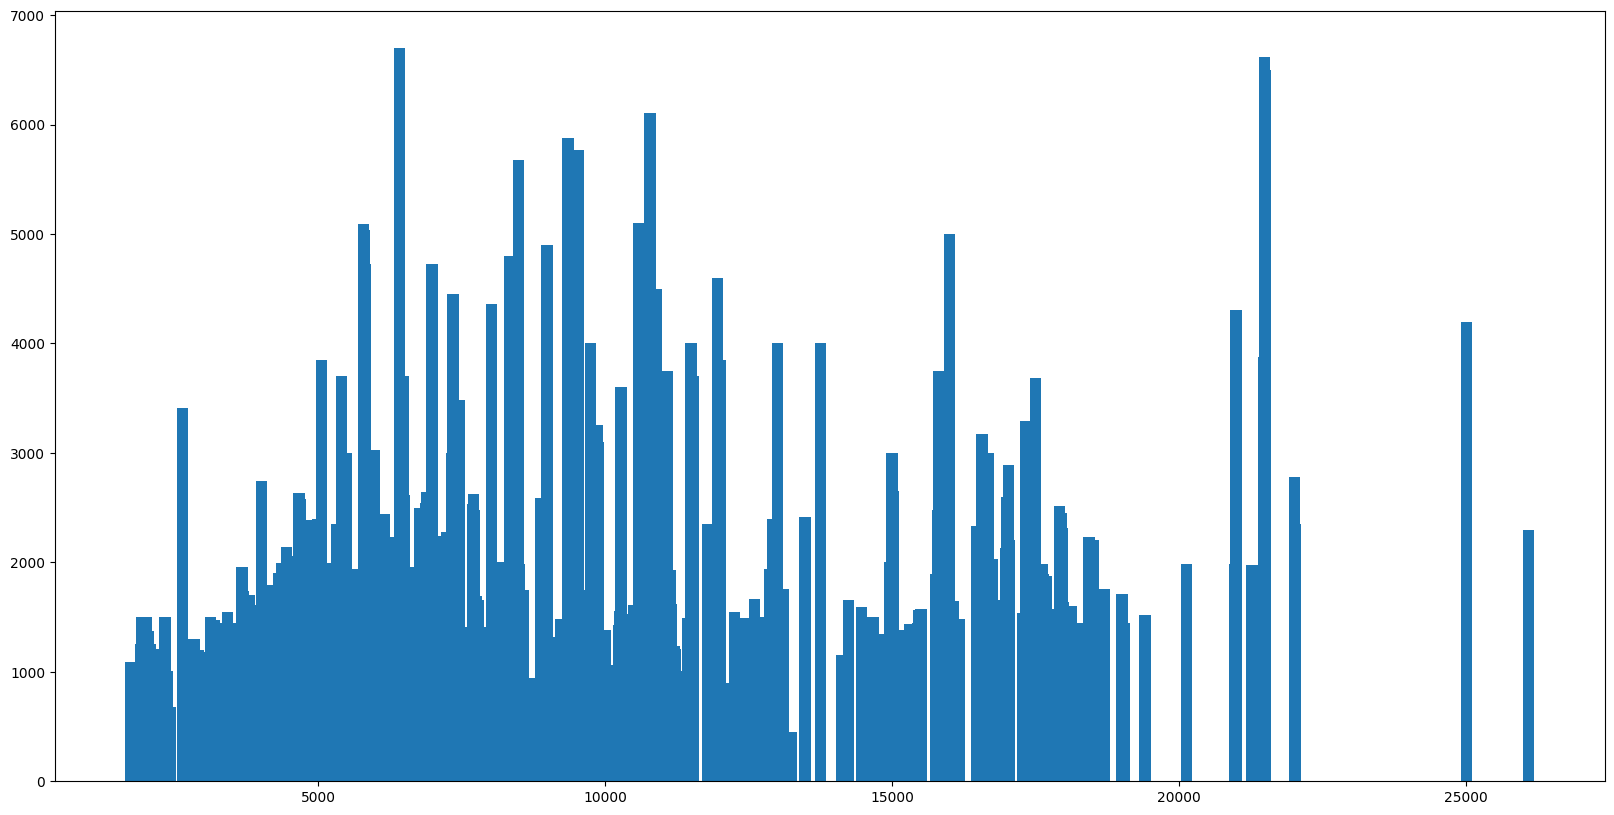

In [76]:
plt.bar(df5.price_per_sqft,df5.area,width=200)

In [77]:
def remove_pps_outliers(df):
    df_out=pd.DataFrame()
    for key,data in df.groupby("location"):
        m=np.mean(data.price_per_sqft)
        st=np.std(data.price_per_sqft)
        reduce_df=data[(data.price_per_sqft>(m-st)) & (data.price_per_sqft<(m+st))]
        df_out=pd.concat([df_out,reduce_df],ignore_index=True)
    return df_out
df6=remove_pps_outliers(df5)
df6.shape

(2011, 7)

Text(0, 0.5, 'count')

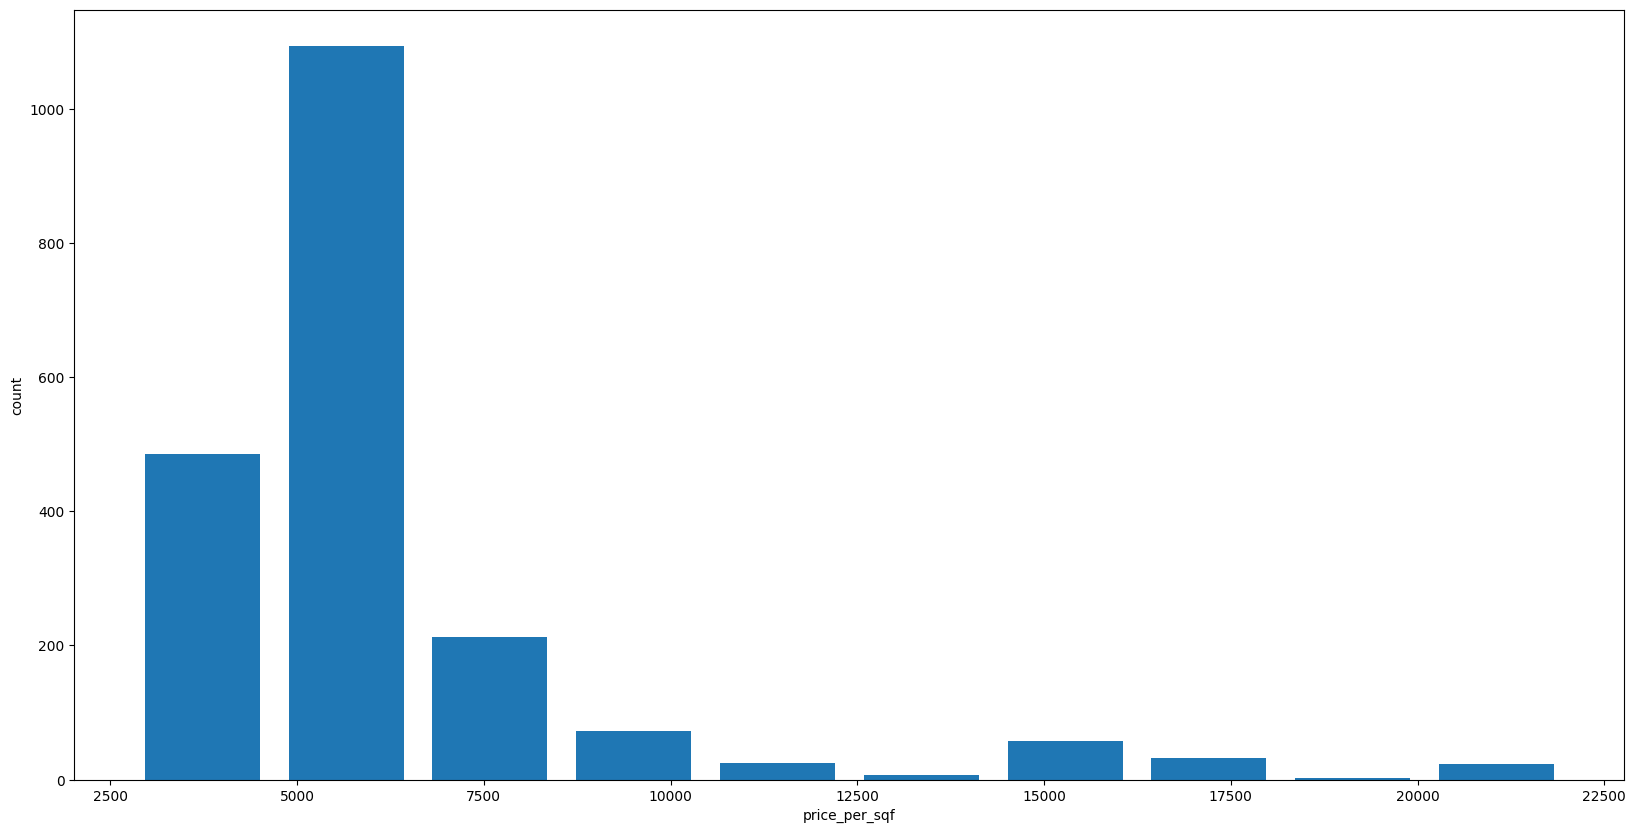

In [78]:
plt.hist(df6.price_per_sqft,rwidth=0.8)
plt.xlabel('price_per_sqf')
plt.ylabel('count')

In [79]:
df6.head()

,price,area,bhk,bathroom,age,location,price_per_sqft
0,261.0,1548,3,2.0,1.0,Adyar,16860.465116
1,278.0,1652,3,2.0,1.0,Adyar,16828.087167
2,274.0,1627,3,2.0,1.0,Adyar,16840.811309
3,210.0,1381,3,3.0,1.0,Adyar,15206.372194
4,325.0,2411,4,4.0,1.0,Adyar,13479.883866


In [80]:
df7=df6.copy()

In [81]:
df8=df7.drop(['price_per_sqft','price'],axis='columns')
df8.head()

,area,bhk,bathroom,age,location
0,1548,3,2.0,1.0,Adyar
1,1652,3,2.0,1.0,Adyar
2,1627,3,2.0,1.0,Adyar
3,1381,3,3.0,1.0,Adyar
4,2411,4,4.0,1.0,Adyar


In [82]:
df8

,area,bhk,bathroom,age,location
0,1548,3,2.0,1.0,Adyar
1,1652,3,2.0,1.0,Adyar
2,1627,3,2.0,1.0,Adyar
3,1381,3,3.0,1.0,Adyar
4,2411,4,4.0,1.0,Adyar
...,...,...,...,...,...
2006,1621,3,3.0,1.0,tambaram west
2007,1180,3,3.0,1.0,tambaram west
2008,1020,2,2.0,1.0,tambaram west
2009,930,2,2.0,1.0,tambaram west


In [83]:
dummies=pd.get_dummies(df8.location,dtype=int)
dummies

,Adyar,Alwarpet,Ambattur,Anna Nagar,Ayanambakkam,Chromepet,East Tambaram,Gerugambakkam,Gowrivakkam,Guduvancheri,...,Tiruvottiyur,Vadanemmeli,Vadapalani,Vanagaram,Velachery,Vengaivasal,Veppampattu,West Mambalam,other,tambaram west
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2006,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2007,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2008,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2009,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [84]:
df9=pd.concat([df8,dummies.drop(['other'],axis='columns')],axis='columns')
df9.head()

,area,bhk,bathroom,age,location,Adyar,Alwarpet,Ambattur,Anna Nagar,Ayanambakkam,...,Thirumullaivoyal,Tiruvottiyur,Vadanemmeli,Vadapalani,Vanagaram,Velachery,Vengaivasal,Veppampattu,West Mambalam,tambaram west
0,1548,3,2.0,1.0,Adyar,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1652,3,2.0,1.0,Adyar,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1627,3,2.0,1.0,Adyar,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1381,3,3.0,1.0,Adyar,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2411,4,4.0,1.0,Adyar,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [88]:
x=df9.drop(['location'],axis='columns')
x.head()

,area,bhk,bathroom,age,Adyar,Alwarpet,Ambattur,Anna Nagar,Ayanambakkam,Chromepet,...,Thirumullaivoyal,Tiruvottiyur,Vadanemmeli,Vadapalani,Vanagaram,Velachery,Vengaivasal,Veppampattu,West Mambalam,tambaram west
0,1548,3,2.0,1.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1652,3,2.0,1.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1627,3,2.0,1.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1381,3,3.0,1.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2411,4,4.0,1.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [89]:
y=df7.price
y

0       261.00
1       278.00
2       274.00
3       210.00
4       325.00
         ...  
2006     85.00
2007     66.08
2008     57.12
2009     52.08
2010     50.40
Name: price, Length: 2011, dtype: float64

In [90]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [91]:
model.fit(x_train,y_train)

LinearRegression()

In [92]:
model.score(x_test,y_test)

0.9293139571633875

In [93]:
cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
cross_val_score(LinearRegression(),x,y,cv=cv)

array([0.92489752, 0.93518283, 0.87554912, 0.93092655, 0.95871164])

In [94]:
x.columns

Index(['area', 'bhk', 'bathroom', 'age', 'Adyar', 'Alwarpet', 'Ambattur',
       'Anna Nagar', 'Ayanambakkam', 'Chromepet', 'East Tambaram',
       'Gerugambakkam', 'Gowrivakkam', 'Guduvancheri', 'Guindy',
       'Iyappanthangal', 'Iyyappanthangal', 'Karapakkam', 'Kelambakkam',
       'Kolapakkam', 'Kolathur', 'Kotturpuram', 'Kovur', 'Koyambedu',
       'Kundrathur', 'Madambakkam', 'Madhavaram', 'Madipakkam', 'Medavakkam',
       'Mogappair', 'Mugalivakkam', 'Nanmangalam', 'Navallur', 'Padur',
       'Pallavaram', 'Pammal', 'Perumbakkam', 'Perungalathur', 'Perungudi',
       'Poonamallee', 'Porur', 'Pozhichalur', 'Rajakilpakkam', 'Royapettah',
       'Selaiyur', 'Sembakkam', 'Semmancheri', 'Sholinganallur', 'Siruseri',
       'Sithalapakkam', 'T Nagar', 'Thaiyur', 'Thirumazhisai',
       'Thirumullaivoyal', 'Tiruvottiyur', 'Vadanemmeli', 'Vadapalani',
       'Vanagaram', 'Velachery', 'Vengaivasal', 'Veppampattu', 'West Mambalam',
       'tambaram west'],
      dtype='object')

In [97]:
with open('chennai_house_price.pickle','wb') as f:
    pickle.dump(model,f)

In [98]:
with open('columns.json','w') as f:
    columns={
    'data_columns' : [col.lower() for col in x.columns]
}
    f.write(json.dumps(columns))